### Name : Varaun Gandhi
### Andrew_ID : vbgandhi

In [563]:
import pandas as pd

df = pd.read_csv('customer_sales.csv')
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
0,BN-2011-7407039,1/1/11,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,$45,-26.0,3.0
1,AZ-2011-9050313,1/3/11,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,$854,290.0,7.0
2,AZ-2011-6674300,1/4/11,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,$140,21.0,3.0
3,BN-2011-2819714,1/4/11,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,$27,-22.0,2.0
4,BN-2011-2819714,1/4/11,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,$17,-1.0,2.0


### Step 1 : Understand the dataset ###

In [564]:
#1. check missing values
df.isna().sum()

#Yes there are missing values in dataset

Order ID          0
Order Date        6
Customer Name     1
Country           1
State             4
City              4
Region            0
Segment           1
Ship Mode         5
Category          5
Sub-Category      0
Product Name      0
Discount          7
Sales             2
Profit           13
Quantity         13
dtype: int64

In [565]:
#2. Range of order date in the dataset
df['Order Date'] = pd.to_datetime(df['Order Date'])
print("Earliest date")
print(df['Order Date'].min())
print("Latest date") 
print(df['Order Date'].max())

Earliest date
2011-01-01 00:00:00
Latest date
2014-12-31 00:00:00


/var/folders/_d/07fvhvx16qj9690gst6xd02r0000gn/T/ipykernel_28757/4053574909.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [566]:
#3. No of unique customers
print("No of unique customers")
df['Customer Name'].nunique()


No of unique customers


792

In [567]:
#4. No of unique orders
print("No of unique orders")
df['Order ID'].nunique()

No of unique orders


4117

In [568]:
#5. Summary statistics for sales min, max, variance, and standard deviations?
print("Summary statistics for sales")
df["Sales"] = df["Sales"].str.replace("[$,]", "", regex=True).astype(float)
df['Sales'].describe()

Summary statistics for sales


count      8045.000000
mean        342.542946
std        3218.073605
min        -110.000000
25%          48.000000
50%         116.000000
75%         313.000000
max      206000.000000
Name: Sales, dtype: float64

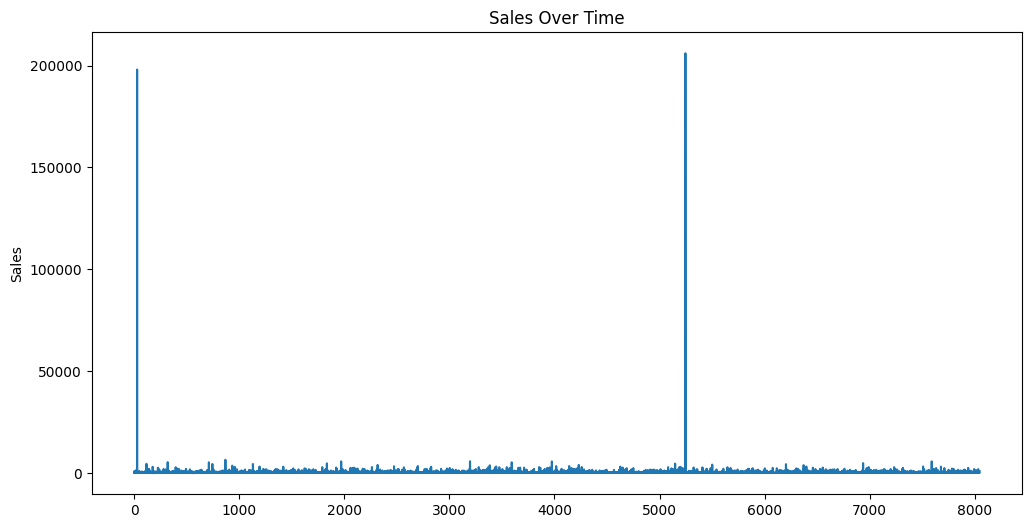

In [569]:
#6. plot the graph of sales over time
import matplotlib.pyplot as plt
df['Sales'].plot(figsize=(12,6))
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.show()


# Apart from the outliers in Jan 2011 and in Jan 2014, the sales data seem to have no increase or decrease trend over time.

### Step 2 : Explore the dataset ###

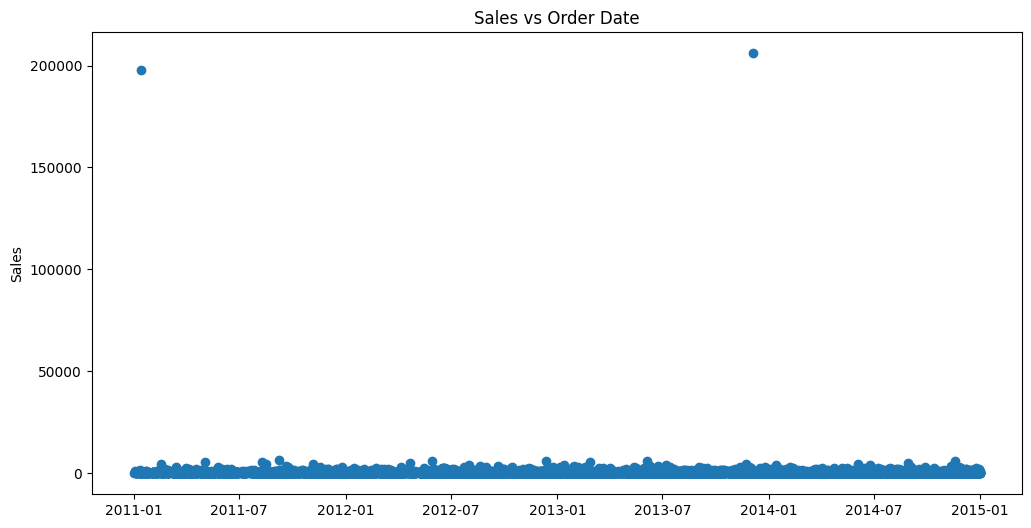

In [570]:
#1. Scatter plot of sales vs order date
plt.figure(figsize=(12,6))
plt.scatter(df['Order Date'], df['Sales'])
plt.ylabel('Sales')
plt.title('Sales vs Order Date')
plt.show()


#Yes, there are a few outliers and they can be treated by eliminating them or by performing log transformation.

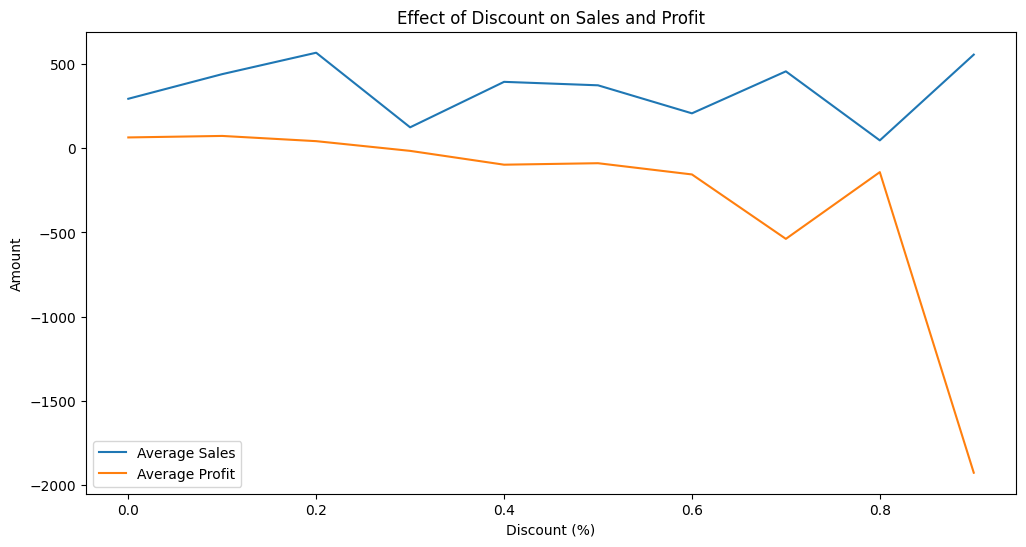

In [571]:
#2. effect of discount on sales and profit
df_grouped = df.groupby('Discount').agg({'Sales':'mean', 'Profit':'mean'}).reset_index()
plt.figure(figsize=(12,6))
plt.plot(df_grouped['Discount'], df_grouped['Sales'], label='Average Sales')
plt.plot(df_grouped['Discount'], df_grouped['Profit'], label='Average Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Amount')
plt.title('Effect of Discount on Sales and Profit')
plt.legend()
plt.show()


#As the graph shows the sales increase till 20% discount and then it starts decreasing
#Whereas the profit keeps decreasing as the discount increases
#At 80% discount the profit takes a steep dive into negative values and sales increases
#Optimal discount is between 10% and 20% as it gives maximum sales and profit

In [572]:
#3. Factors affecting sales using regression
import statsmodels.api as sm
df_reg = df[['Sales', 'Profit', 'Quantity', 'Discount']]
df_reg = df_reg.dropna()
X = df_reg[['Profit', 'Quantity', 'Discount']]
y = df_reg['Sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


#The factors that affect sales the most are quantity followed by discount

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     21.32
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           9.42e-14
Time:                        16:33:56   Log-Likelihood:                -76241.
No. Observations:                8032   AIC:                         1.525e+05
Df Residuals:                    8028   BIC:                         1.525e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.6265     74.823     -1.171      0.2

### Step 3: Determine origin year of customers

In [573]:
# Determine origin year of customers
df = df.dropna(subset=["Order Date", "Sales"]).copy()
cust_first_dt = (
    df.groupby("Customer Name", dropna=False)["Order Date"]
      .transform("min")
)
df["Origin Year"] = cust_first_dt.dt.year.astype(int)
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Origin Year
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45.0,-26.0,3.0,2011
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854.0,290.0,7.0,2011
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140.0,21.0,3.0,2011
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27.0,-22.0,2.0,2011
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17.0,-1.0,2.0,2011


### Step 4: Calculate cumulative transaction amounts ###

In [574]:
# Calculate cumulative sales by customer age in months

df["Cohort Start"] = pd.to_datetime(df["Origin Year"].astype(str) + "-01-01")
df["AgeMonths"] = (
    (df["Order Date"].dt.year - df["Cohort Start"].dt.year) * 12
    + (df["Order Date"].dt.month - df["Cohort Start"].dt.month)
).astype(int)
df = df[df["AgeMonths"] >= 0].copy()
age_cutoffs = [12, 24, 36, 48]
rows = []
for oy, g in df.groupby("Origin Year", dropna=False):
    row = {"Origin Year": int(oy)}
    for cutoff in age_cutoffs:
        row[f"{cutoff}"] = g.loc[g["AgeMonths"] <= cutoff, "Sales"].sum()
    rows.append(row)
amount_cmltv = (pd.DataFrame(rows).sort_values("Origin Year").reset_index(drop=True))
amount_cmltv



,Origin Year,12,24,36,48
0,2011,630527.0,981100.0,1359026.0,1810390.0
1,2012,219946.0,396507.0,577810.0,577810.0
2,2013,293581.0,354919.0,354919.0,354919.0
3,2014,12108.0,12108.0,12108.0,12108.0


### Step 5: Calculate the number of new customers ###

In [575]:
#Calculate new customers by customer age in months
new_customers_per_cohort = (
    df.groupby("Origin Year", dropna=False)["Customer Name"]
      .nunique()
      .rename("New Customers")
      .reset_index()
      .astype({"Origin Year": int, "New Customers": int})
      .sort_values("Origin Year")
)
age_cutoffs = [12, 24, 36, 48]
new_rows = []
for _, row in new_customers_per_cohort.iterrows():
    oy = int(row["Origin Year"])
    cnt = int(row["New Customers"])
    new_row = {"Origin Year": oy}
    for cutoff in age_cutoffs:
        new_row[f"{cutoff}"] = cnt 
    new_rows.append(new_row)
newcustomers_cmltv


,Origin Year,12,24,36,48
0,2011,492,492,492,492
1,2012,204,204,204,204
2,2013,79,79,79,79
3,2014,17,17,17,17


### Step 6: Historic CLV ###

In [576]:
# Calculate customer lifetime value (CLV)
clv = amount_cmltv.set_index("Origin Year") / newcustomers_cmltv.set_index("Origin Year")
clv = clv.reset_index()
clv

,Origin Year,12,24,36,48
0,2011,1281.558943,1994.105691,2762.247967,3679.654472
1,2012,1078.166667,1943.661765,2832.401961,2832.401961
2,2013,3716.215190,4492.645570,4492.645570,4492.645570
3,2014,712.235294,712.235294,712.235294,712.235294


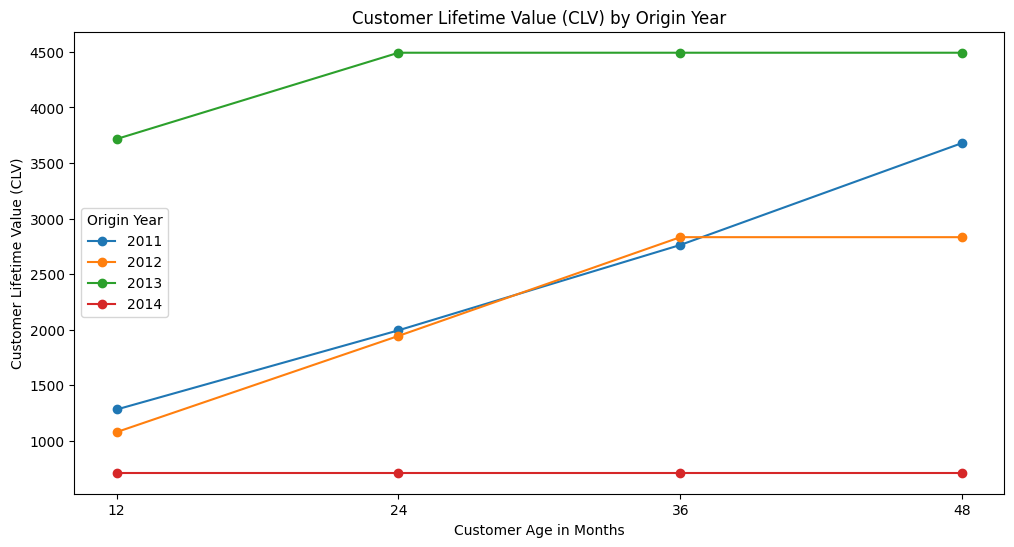

In [577]:
#plot the graph of CLV
clv_melted = clv.melt(id_vars="Origin Year", var_name="AgeMonths",value_name="CLV").reset_index(drop=True)
plt.figure(figsize=(12,6))
for oy, g in clv_melted.groupby("Origin Year"):
    plt.plot(g["AgeMonths"], g["CLV"], marker='o', label=str(oy))
plt.xlabel('Customer Age in Months')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.title('Customer Lifetime Value (CLV) by Origin Year')
plt.legend(title='Origin Year')
plt.show()





### Step 7: Interpreting your results ###

In [578]:
#1. Based on the analysis, customers acquired in the year 2011 have spent $1810390 in their lifetime
#2. The graph plotted based on historic CLV indicates that there is no pattern in spending, as customers
#   acquired in 2013 have a higher CLV than those acquired in 2011, 2012, and 2014. and the business model should focus and analyze what led to the 
#   higher CLV in 2013 and replicate the same for future customer acquisition strategies.
